In [53]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [75]:
# foldname = '/home/mossing/scratch/2Pdata/171211/M7199/'
# filename = 'M7199_000_001'
foldname = '/home/mossing/scratch/2Pdata/171208/M7307/'
filename = 'M7307_000_001'

In [76]:
corrfile = sio.loadmat(foldname+filename+'_corrected.mat',squeeze_me=True)
infofile = sio.loadmat(foldname+filename+'.mat',squeeze_me=True)
retfile = sio.loadmat(foldname+'retinotopy_'+filename[-3:]+'.mat',squeeze_me=True)

/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/io/matlab/mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [77]:
locinds = retfile['locinds']

In [78]:
frame = infofile['info'][()]['frame'][()]
frame = frame[2:-10] # this format for all the retinotopic mapping through 12/12

In [79]:
data = corrfile['corrected']

<IPython.core.display.Javascript object>


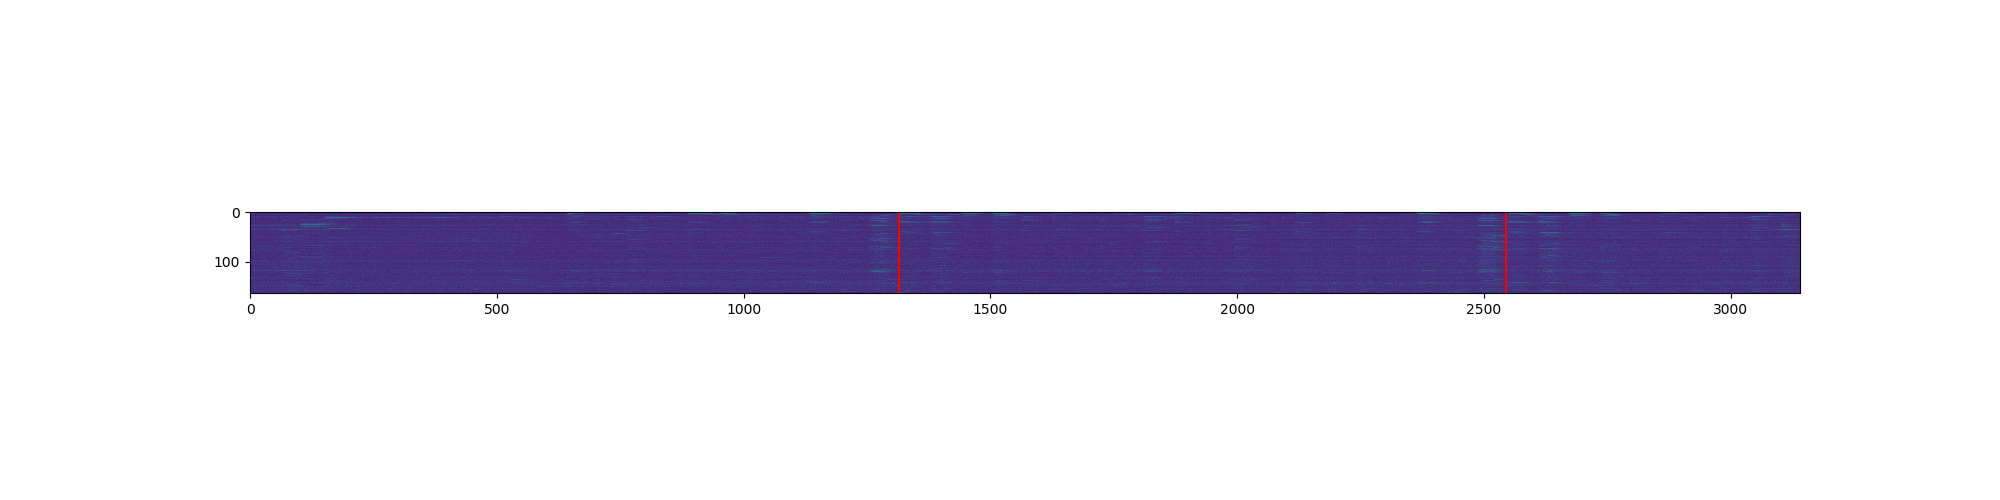

In [80]:
plt.figure(figsize=(20,5))
plt.imshow(data)
for i,frm in enumerate(frame[2:-10:2]):
    if locinds[i,0]==3 and locinds[i,1]==3:
        plt.plot((frm,frm),(0,data.shape[0]-1),c='r')

In [81]:
Ny = locinds[:,0].max()
Nx = locinds[:,1].max()

In [82]:
ret = np.zeros((data.shape[0],Ny,Nx))
# for i in range(data.shape[0]):
for j in range(Ny):
    for k in range(Nx):
        lkat = np.logical_and(locinds[:,0]==j+1,locinds[:,1]==k+1)
        n = lkat.sum()
        for idx in np.where(lkat)[0]:
            ret[:,j,k] = ret[:,j,k] + data[:,int(frame[0::2][idx]):int(frame[1::2][idx])].mean(1)/n

<IPython.core.display.Javascript object>


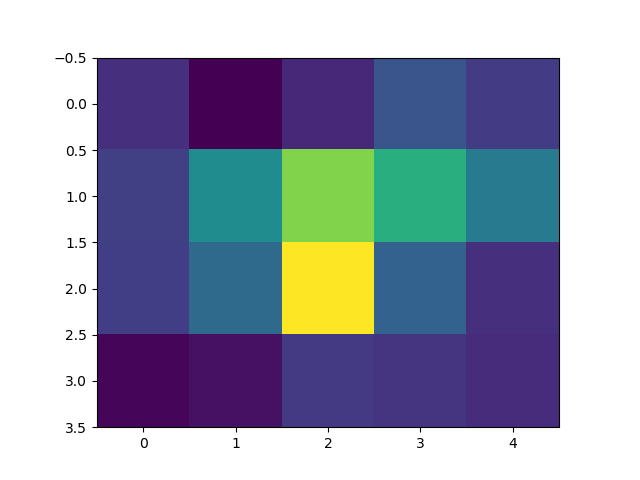

In [83]:
plt.imshow(ret.mean(0))

<IPython.core.display.Javascript object>


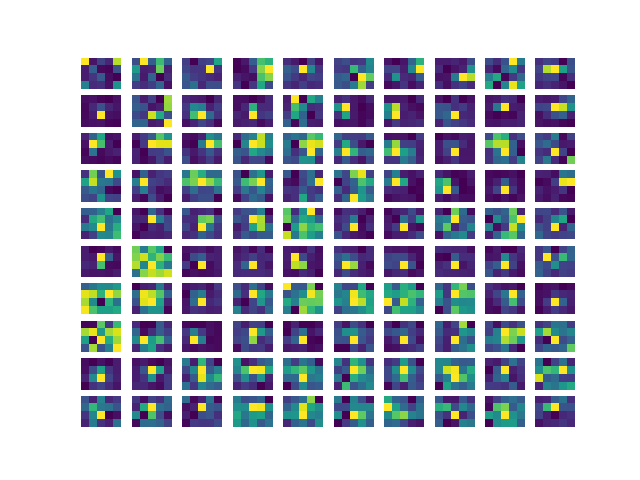

In [87]:
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(ret[i])
    plt.axis('off')